In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Build a model

# Plain model

### Sequential API

In [7]:
from tensorflow import keras

In [12]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ]
)
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid),
)

Epoch 1/20
151/363 [===========>..................] - ETA: 0s - loss: 0.9714 

2022-08-16 07:05:59.866097: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


363/363 [==============================] - 0s 538us/step - loss: 0.8408 - val_loss: 1.1505
Epoch 2/20
363/363 [==============================] - 0s 397us/step - loss: 0.8426 - val_loss: 0.5133
Epoch 3/20
363/363 [==============================] - 0s 390us/step - loss: 0.4646 - val_loss: 0.4796
Epoch 4/20
363/363 [==============================] - 0s 382us/step - loss: 0.4386 - val_loss: 0.4660
Epoch 5/20
363/363 [==============================] - 0s 385us/step - loss: 0.4523 - val_loss: 0.8506
Epoch 6/20
363/363 [==============================] - 0s 385us/step - loss: 0.4425 - val_loss: 0.4586
Epoch 7/20
363/363 [==============================] - 0s 385us/step - loss: 0.4128 - val_loss: 0.4413
Epoch 8/20
363/363 [==============================] - 0s 388us/step - loss: 0.4072 - val_loss: 0.4350
Epoch 9/20
363/363 [==============================] - 0s 385us/step - loss: 0.3964 - val_loss: 0.4299
Epoch 10/20
363/363 [==============================] - 0s 391us/step - loss: 0.3913 - val_los

<AxesSubplot:>

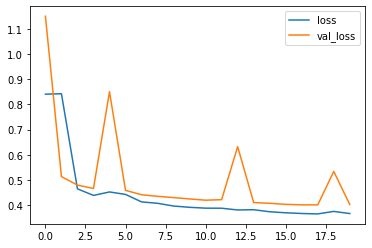

In [15]:
import pandas as pd
pd_history = pd.DataFrame(history.history)
pd_history.plot()

In [16]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 30ms/step


Building Complex Models Using the Functional API

# Fig 10-14

### Functional API

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
# construct a model
# compile the model
# train the model
# evaluate the model
# use it to make predictions

In [19]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history_wide_deep = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid),
)

Epoch 1/20
363/363 [==============================] - 0s 499us/step - loss: 0.3663 - val_loss: 0.3935
Epoch 2/20
363/363 [==============================] - 0s 396us/step - loss: 0.3562 - val_loss: 0.4008
Epoch 3/20
363/363 [==============================] - 0s 393us/step - loss: 0.3555 - val_loss: 0.3953
Epoch 4/20
363/363 [==============================] - 0s 392us/step - loss: 0.3543 - val_loss: 0.3881
Epoch 5/20
363/363 [==============================] - 0s 391us/step - loss: 0.3517 - val_loss: 0.3860
Epoch 6/20
363/363 [==============================] - 0s 391us/step - loss: 0.3535 - val_loss: 0.3884
Epoch 7/20
363/363 [==============================] - 0s 392us/step - loss: 0.3487 - val_loss: 0.3927
Epoch 8/20
363/363 [==============================] - 0s 394us/step - loss: 0.3518 - val_loss: 0.3866
Epoch 9/20
363/363 [==============================] - 0s 389us/step - loss: 0.3470 - val_loss: 0.3902
Epoch 10/20
363/363 [==============================] - 0s 391us/step - loss: 0.345

<AxesSubplot:>

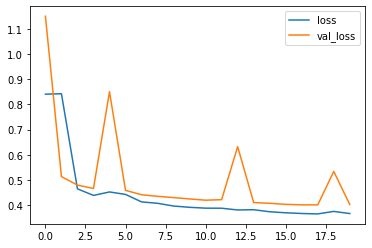

In [20]:
pd_history_wide_deep = pd.DataFrame(history.history)
pd_history_wide_deep.plot()

# Fig 10-15

In [21]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [22]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B), 
    y_train, 
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
129/363 [=========>....................] - ETA: 0s - loss: 3.5050 

/Users/soomin/.pyenv/versions/miniforge3-4.10.1-5/envs/handson-conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 0s 577us/step - loss: 2.3018 - val_loss: 1.1938
Epoch 2/20
363/363 [==============================] - 0s 443us/step - loss: 0.8580 - val_loss: 0.7480
Epoch 3/20
363/363 [==============================] - 0s 439us/step - loss: 0.6749 - val_loss: 0.6618
Epoch 4/20
363/363 [==============================] - 0s 441us/step - loss: 0.6070 - val_loss: 0.6256
Epoch 5/20
363/363 [==============================] - 0s 445us/step - loss: 0.5703 - val_loss: 0.5930
Epoch 6/20
363/363 [==============================] - 0s 447us/step - loss: 0.5435 - val_loss: 0.5717
Epoch 7/20
363/363 [==============================] - 0s 447us/step - loss: 0.5287 - val_loss: 0.5583
Epoch 8/20
363/363 [==============================] - 0s 460us/step - loss: 0.5134 - val_loss: 0.5494
Epoch 9/20
363/363 [==============================] - 0s 453us/step - loss: 0.5039 - val_loss: 0.5400
Epoch 10/20
363/363 [==============================] - 0s 443us/step - loss: 0.4996 - val_los

<AxesSubplot:>

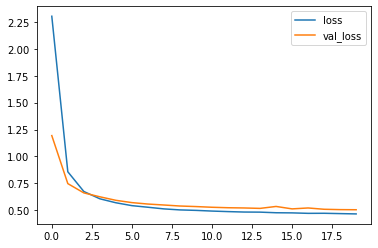

In [23]:
pd.DataFrame(history.history).plot()

# many cases where you want to have multiple outputs:
1. Locate (regression) & classify (classification) the main object in a picture
2. Multiple independent tasks based on the same data
    ex: classify the person's facial expression & identify whether the person is wearing glasses or not.
3. Regularization technique
    ex: add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

# Fig 10-16

In [26]:
# Adding auxilirary output

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# Need to specify loss & loss weights individually to assign what you want.
model.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer="sgd",
)

In [27]:
history = model.fit(
    [X_train_A, X_train_B], 
    [y_train, y_train], 
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 0s 682us/step - loss: 1.0028 - output_loss: 0.8326 - aux_output_loss: 2.5352 - val_loss: 0.6614 - val_output_loss: 0.5939 - val_aux_output_loss: 1.2692
Epoch 2/20
363/363 [==============================] - 0s 597us/step - loss: 0.5808 - output_loss: 0.5223 - aux_output_loss: 1.1070 - val_loss: 0.6810 - val_output_loss: 0.6416 - val_aux_output_loss: 1.0358
Epoch 3/20
363/363 [==============================] - 0s 516us/step - loss: 0.5226 - output_loss: 0.4767 - aux_output_loss: 0.9362 - val_loss: 0.5352 - val_output_loss: 0.4931 - val_aux_output_loss: 0.9141
Epoch 4/20
363/363 [==============================] - 0s 512us/step - loss: 0.4940 - output_loss: 0.4564 - aux_output_loss: 0.8320 - val_loss: 0.5180 - val_output_loss: 0.4834 - val_aux_output_loss: 0.8298
Epoch 5/20
363/363 [==============================] - 0s 521us/step - loss: 0.4722 - output_loss: 0.4401 - aux_output_loss: 0.7616 - val_loss: 0.5038 - val_output_loss: 0.4737 

In [28]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 367us/step - loss: 0.3976 - output_loss: 0.3797 - aux_output_loss: 0.5594


In [29]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 23ms/step


In [31]:
model.save("my_keras_model.h5")
# model architecture
# every layer's hyperparameters
# values of all the model hyperparameters
# optimizer
model_saved = keras.models.load_model("my_keras_model.h5")

In [36]:
type(model)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           930         ['dense_4[0][0]']                
                                                                                            

In [37]:
type(model_saved)
model_saved.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           930         ['dense_4[0][0]']                
                                                                                            

# Using the subclasss API to build dynamic models

### Model Subclass API

In [ ]:
# Moreover, Keras cannot check types and shapes ahead of time, 
# and it is easier to make mistakes. 
# So unless you really need that extra flexibility, 
# you should probably stick to the Sequential API or the Functional API.

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)

        return main_output, aux_output

model = WideAndDeepModel()